# 0. Setup Paths

In [3]:
import os

In [4]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_museum' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [5]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [6]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [7]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [8]:
paths

{'WORKSPACE_PATH': 'Tensorflow\\workspace',
 'SCRIPTS_PATH': 'Tensorflow\\scripts',
 'APIMODEL_PATH': 'Tensorflow\\models',
 'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations',
 'IMAGE_PATH': 'Tensorflow\\workspace\\images',
 'MODEL_PATH': 'Tensorflow\\workspace\\models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_museum',
 'OUTPUT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_museum\\export',
 'TFJS_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_museum\\tfjsexport',
 'TFLITE_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_museum\\tfliteexport',
 'PROTOC_PATH': 'Tensorflow\\protoc'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [9]:
if os.name=='nt':
    !pip install wget
    import wget


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

In [10]:
import tensorflow.compat.v1 as tf

In [ ]:
!pip list

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [11]:
import tensorflow as tf

if tf.__version__.startswith("2."):
    print("TensorFlow 2.x is being used.")
else:
    print("TensorFlow 2.x is not being used.")

TensorFlow 2.x is being used.


In [12]:
import tf_slim as slim

In [ ]:
pip install --upgrade

In [13]:
import tensorflow.compat.v1 as tf

In [ ]:
!pip install "tensorflow<2.11" 

In [ ]:
!pip install --upgrade h5py

In [ ]:
!pip install tensorflow 

In [ ]:
!pip list

In [ ]:
!pip install --upgrade pip

In [ ]:
import tensorflow.compat.v1 as tf

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [14]:
import object_detection

In [ ]:
!pip list

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

# 2. Create Label Map

In [15]:
labels = [{'name':'ConicalCap', 'id':1}, {'name':'Gahoniya', 'id':2}, {'name':'JaffnaTamilsHat', 'id':3}, {'name':'JagalatToppiya', 'id':4}, {'name':'MaldivianHat', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

# 4. Copy Model Config to Training Folder

In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
config

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
labels

In [ ]:
pipeline_config.model.ssd.num_classes = len(labels)
# update number of classes
pipeline_config.train_config.batch_size = 5
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [ ]:
config

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# 6. Train the model

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:
print(command)

In [ ]:
!{command}

# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# tensorboard - loss matrix
#(tfod) D:\GitHub\Museum_Object_Detection\Tensorflow\workspace\models\my_ssd_mobnet\train>tensorboard --logdir=.

# tensorboard - Evaluation matrix
# (tfod) D:\GitHub\Museum_Object_Detection\Tensorflow\workspace\models\my_ssd_mobnet\eval>tensorboard --logdir=.

# 8. Load Train Model From Checkpoint

In [1]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [16]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
# 'ckpt-3' -latest checkpoint in D:\GitHub\Museum_Object_Detection\Tensorflow\workspace\models\my_ssd_mobnet
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [26]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [28]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'ConicalCap (1).jpg')

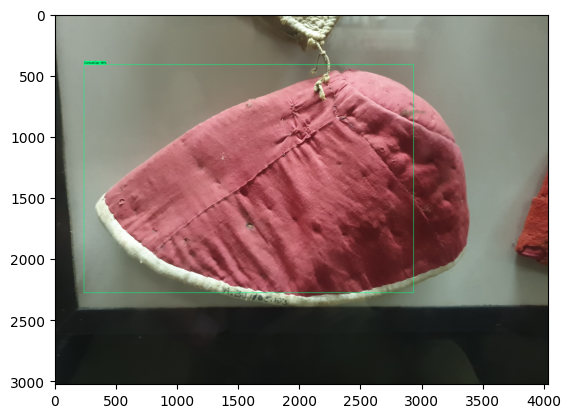

In [29]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

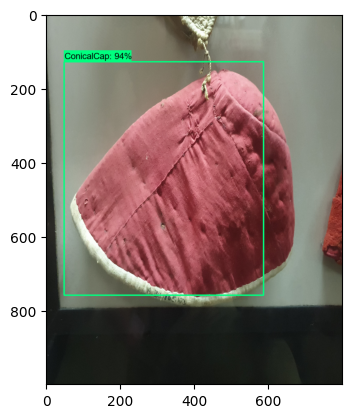

In [30]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from object_detection.utils import visualization_utils as viz_utils

# Load the image
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

# Resize the image for visualization
# You can adjust the new size as needed
new_height, new_width = 1000, 800  # Example dimensions
image_np = cv2.resize(image_np, (new_width, new_height))

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'] + label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=.4,
    agnostic_mode=False
)

# Show the resized and annotated image
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


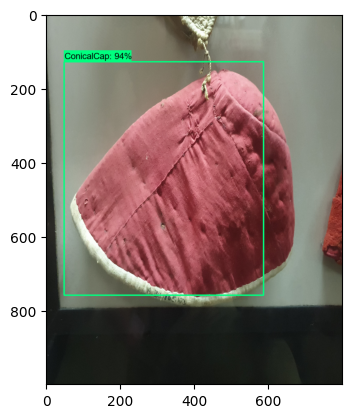

In [31]:
# Load the label map file.
label_map = tf.io.gfile.GFile(files['LABELMAP'], 'r').read()
label_map

# Create a dictionary to map label IDs to label names.
# label_id_to_name_map = {}
# for item in label_map.item:
#   label_id = item.id
#   label_name = item.name
#   label_id_to_name_map[label_id] = label_name

# Read the image.
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

# Resize the image for visualization
new_height, new_width = 1000, 800
image_np = cv2.resize(image_np, (new_width, new_height))

# Convert the image to a Tensor.
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

# Detect objects in the image.
detections = detect_fn(input_tensor)

# Get the number of detections.
num_detections = int(detections.pop('num_detections'))

# Get the detection boxes and classes.
detection_boxes = detections['detection_boxes'].numpy()
detection_classes = detections['detection_classes'].numpy()

# Convert the detection classes to integers.
detection_classes = detection_classes.astype(np.int64)

# Add one to the detection classes to account for the label ID offset.
detection_classes += 1

# Get the label names for the detections.
label_names = []
for detection_class in detection_classes:
    for num in detection_class:
        label_name = labels[num-1]['name']
        label_names.append(label_name)

# Visualize the detections on the image.
# viz_utils.visualize_boxes_and_labels_on_image_array(
#     image_np_with_detections,
#     detection_boxes,
#     label_names,
#     detections['detection_scores'],
#     category_index,
#     use_normalized_coordinates=True,
#     max_boxes_to_draw=5,
#     min_score_thresh=.8,
#     agnostic_mode=False)

# Display the image.
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
label_names

['ConicalCap',
 'ConicalCap',
 'ConicalCap',
 'JagalatToppiya',
 'Gahoniya',
 'JagalatToppiya',
 'JagalatToppiya',
 'MaldivianHat',
 'JaffnaTamilsHat',
 'JagalatToppiya',
 'JaffnaTamilsHat',
 'MaldivianHat',
 'ConicalCap',
 'ConicalCap',
 'ConicalCap',
 'MaldivianHat',
 'MaldivianHat',
 'JaffnaTamilsHat',
 'Gahoniya',
 'JaffnaTamilsHat',
 'ConicalCap',
 'MaldivianHat',
 'ConicalCap',
 'JagalatToppiya',
 'JaffnaTamilsHat',
 'Gahoniya',
 'MaldivianHat',
 'Gahoniya',
 'JaffnaTamilsHat',
 'JagalatToppiya',
 'MaldivianHat',
 'JaffnaTamilsHat',
 'MaldivianHat',
 'JagalatToppiya',
 'MaldivianHat',
 'ConicalCap',
 'MaldivianHat',
 'ConicalCap',
 'JaffnaTamilsHat',
 'Gahoniya',
 'JagalatToppiya',
 'ConicalCap',
 'MaldivianHat',
 'ConicalCap',
 'ConicalCap',
 'MaldivianHat',
 'JagalatToppiya',
 'Gahoniya',
 'JagalatToppiya',
 'JagalatToppiya',
 'Gahoniya',
 'Gahoniya',
 'MaldivianHat',
 'ConicalCap',
 'MaldivianHat',
 'JagalatToppiya',
 'Gahoniya',
 'JagalatToppiya',
 'MaldivianHat',
 'JagalatTo

In [33]:
highest_label = max(label_names, key=label_names.count)
highest_label

'JagalatToppiya'

In [34]:
tf.io.gfile.glob("path/to/train.record*")
tf.io.gfile.glob("path/to/test.record*")

[]

In [35]:
detection_classes

array([[1, 1, 1, 4, 2, 4, 4, 5, 3, 4, 3, 5, 1, 1, 1, 5, 5, 3, 2, 3, 1, 5,
        1, 4, 3, 2, 5, 2, 3, 4, 5, 3, 5, 4, 5, 1, 5, 1, 3, 2, 4, 1, 5, 1,
        1, 5, 4, 2, 4, 4, 2, 2, 5, 1, 5, 4, 2, 4, 5, 4, 4, 3, 4, 5, 5, 5,
        2, 3, 3, 4, 3, 4, 5, 5, 4, 4, 1, 4, 2, 1, 4, 2, 1, 2, 5, 5, 3, 3,
        4, 2, 5, 4, 3, 3, 5, 1, 4, 5, 4, 3]], dtype=int64)

In [36]:
labels[1]
# labels[1]['name']

{'name': 'Gahoniya', 'id': 2}

In [37]:
for detection_class in detection_classes:
    for num in detection_class:
        print(num)

1
1
1
4
2
4
4
5
3
4
3
5
1
1
1
5
5
3
2
3
1
5
1
4
3
2
5
2
3
4
5
3
5
4
5
1
5
1
3
2
4
1
5
1
1
5
4
2
4
4
2
2
5
1
5
4
2
4
5
4
4
3
4
5
5
5
2
3
3
4
3
4
5
5
4
4
1
4
2
1
4
2
1
2
5
5
3
3
4
2
5
4
3
3
5
1
4
5
4
3


In [38]:
# Get the detected bounding boxes and labels.
detections = detect_fn(input_tensor)

# Create a new variable to store the detected label.
detected_label = None

# Get the value of the detection_classes key.
detection_classes = detections['detection_classes']

# Get the index of the highest scoring bounding box.
highest_scoring_bbox_index = np.argmax(detections['detection_scores'])

# Get the detected label for the highest scoring bounding box.
detected_label = detection_classes[highest_scoring_bbox_index]

# Print the detected label.
print(detected_label)

tf.Tensor(
[0. 0. 0. 3. 1. 3. 3. 4. 2. 3. 2. 4. 0. 0. 0. 4. 4. 2. 1. 2. 0. 4. 0. 3.
 2. 1. 4. 1. 2. 3. 4. 2. 4. 3. 4. 0. 4. 0. 2. 1. 3. 0. 4. 0. 0. 4. 3. 1.
 3. 3. 1. 1. 4. 0. 4. 3. 1. 3. 4. 3. 3. 2. 3. 4. 4. 4. 1. 2. 2. 3. 2. 3.
 4. 4. 3. 3. 0. 3. 1. 0. 3. 1. 0. 1. 4. 4. 2. 2. 3. 1. 4. 3. 2. 2. 4. 0.
 3. 4. 3. 2.], shape=(100,), dtype=float32)


In [39]:
# Load the label map file.
label_map = tf.io.gfile.GFile('path/to/label_map.pbtxt', 'r').read()

# Create a dictionary to map label IDs to label names.
label_id_to_name_map = {}
for item in label_map.item:
  label_id = item.id
  label_name = item.name
  label_id_to_name_map[label_id] = label_name

# Get the label IDs for the bounding boxes.
label_ids = tf.cast(detections['detection_classes'], tf.int32).numpy()

# Look up the label names in the dictionary.
label_names = []
for label_id in label_ids:
  label_name = label_id_to_name_map[label_id]
  label_names.append(label_name)

# Print the label names.
for label_name in label_names:
  print(label_name)

NotFoundError: NewRandomAccessFile failed to Create/Open: path/to/label_map.pbtxt : The system cannot find the path specified.
; No such process

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [ ]:
# close - q

# 10. Freezing the Graph

In [17]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [18]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [19]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_museum\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_museum --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_museum\export


In [21]:
!{command}

Traceback (most recent call last):
  File "D:\GitHub\Museum_Ethnic_Garment_Detection\Museum_Models\Tensorflow\models\research\object_detection\exporter_main_v2.py", line 102, in <module>
    import tensorflow.compat.v2 as tf
ModuleNotFoundError: No module named 'tensorflow'


# 11. Conversion to TFJS

In [23]:
!pip install tensorflowjs

  Using cached tensorflowjs-4.14.0-py3-none-any.whl (89 kB)
  Using cached flax-0.7.5-py3-none-any.whl (244 kB)
  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_decision_forests-1.8.1-cp310-cp310-win_amd64.whl
  Using cached optax-0.1.7-py3-none-any.whl (154 kB)
  Using cached orbax_checkpoint-0.4.4-py3-none-any.whl (123 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached chex-0.1.85-py3-none-any.whl (95 kB)
  Using cached google_auth_oauthlib-1.1.0-py2.py3-none-any.whl (19 kB)
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Rolling back uninstall of google-auth-oauthlib
  Moving to c:\python310\lib\site-packages\google_auth_oauthlib-0.4.6.dist-info\
   from C:\Python310\Lib\site-p

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\google-oauthlib-tool.exe' -> 'C:\\Python310\\Scripts\\google-oauthlib-tool.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [25]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet_museum\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet_museum\tfjsexport


In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')